# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21060,76",-5585,"6958,22","22433,98","22364,7","-69,28","-213,88",0
1,2,"22364,7",-6145,"7053,56","23273,26","23332,72","59,46","-182,83",0
2,3,"23332,72",-6165,"7874,67","25042,39","24963,57","-78,82","-130,94",0
3,4,"24963,57",-5855,"3650,7","22759,27","22775,54","16,27","-94,01",0
4,5,"22775,54",-6020,"6527,31","23282,85","23235,8","-47,05","-104,34",0
...,...,...,...,...,...,...,...,...,...
995,996,"15390,86",-6025,"7062,64","16428,5","16374,81","-53,69","-246,44",1
996,997,"16374,81",-6400,"5748,32","15723,13","15677,62","-45,51","-353,89",1
997,998,"15677,62",-6125,"4719,72","14272,34","14356,39","84,05","-267,06",1
998,999,"14356,39",-6120,"5031,76","13268,15","13320,37","52,22","-190,72",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22430,06","-6075,0","5976,32","22331,38","22376,0","44,62","-116,83",0
1,2,"22376,0","-6065,0","3965,07","20276,07","20290,81","14,74","-45,27",0
2,3,"20290,81","-5775,0","6982,55","21498,36","21513,87","15,51","-60,91",0
3,4,"21513,87","-6035,0","6956,14","22435,01","22426,74","-8,27","5,59",0
4,5,"22426,74","-6030,0","6377,94","22774,68","22817,15","42,47","36,97",0
...,...,...,...,...,...,...,...,...,...
995,996,"2107,2","-5828,98","6463,64","2741,86","2620,44","-121,42","-167,54",1
996,997,"2620,44","-5955,0","6142,6","2808,04","2771,02","-37,02","-143,07",1
997,998,"2771,02","-5896,0","3108,82","-16,16","25,62","41,78","-150,11",1
998,999,"25,62","-5592,26","6421,37","854,73","896,61","41,88","-83,97",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,22","-5810,0","7001,2","23334,42","23347,02","12,6","-90,27",0
1,2,"23347,02","-6240,0","7270,93","24377,95","24283,54","-94,41","-105,27",0
2,3,"24283,54","-6430,0","3650,03","21503,57","21510,13","6,56","-17,7",0
3,4,"21510,13","-5850,0","6940,97","22601,1","22644,04","42,94","27,91",0
4,5,"22644,04","-6025,0","5910,84","22529,88","22565,92","36,04","80,35",0
...,...,...,...,...,...,...,...,...,...
995,996,"20,99","-0,0","0,0","20,99","7,38","-13,61","5,7",1
996,997,"7,38","-0,0","0,0","7,38","2,99","-4,39","-5,43",1
997,998,"2,99","-0,0","0,0","2,99","14,37","11,38","9,91",1
998,999,"14,37","-0,0","0,0","14,37","23,46","9,09","10,89",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21287,51","-6070,0","7042,91","22260,42","22216,71","-43,71","188,2",0
1,2,"22216,71","-6065,0","4682,57","20834,28","20856,74","22,46","259,79",0
2,3,"20856,74","-6035,0","7234,09","22055,83","22134,3","78,47","272,27",0
3,4,"22134,3","-6120,0","5847,84","21862,14","22001,79","139,65","380,74",0
4,5,"22001,79","-5605,0","3757,23","20154,02","20186,77","32,75","279,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,31","-0,0","0,0","3,31","4,22","0,91","-5,75",1
996,997,"4,22","-0,0","0,0","4,22","14,3","10,08","7,99",1
997,998,"14,3","-0,0","0,0","14,3","12,66","-1,64","10,33",1
998,999,"12,66","-0,0","0,0","12,66","2,96","-9,7","-1,54",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17548,09","-6265,0","4958,31","16241,4","16245,87","4,47","160,94",0
1,2,"16245,87","-5725,0","6084,29","16605,16","16550,86","-54,3","43,48",0
2,3,"16550,86","-5880,0","6957,27","17628,13","17694,1","65,97","93,95",0
3,4,"17694,1","-6025,0","7912,37","19581,47","19651,53","70,06","229,9",0
4,5,"19651,53","-5880,0","5996,13","19767,66","19771,94","4,28","319,27",0
...,...,...,...,...,...,...,...,...,...
995,996,"9,49","-0,0","0,0","9,49","2,52","-6,97","-20,78",1
996,997,"2,52","-0,0","0,0","2,52","1,6","-0,92","-5,93",1
997,998,"1,6","-0,0","0,0","1,6","7,92","6,32","-9,84",1
998,999,"7,92","-0,0","0,0","7,92","1,37","-6,55","-12,18",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18283,0","-5740,0","5871,72","18414,72","18396,89","-17,83","131,0",0
1,2,"18396,89","-5840,0","9160,46","21717,35","21705,02","-12,33","136,48",0
2,3,"21705,02","-5970,0","7545,21","23280,23","23195,67","-84,56","-10,11",0
3,4,"23195,67","-6095,0","5478,44","22579,11","22659,31","80,2","33,42",0
4,5,"22659,31","-5655,0","7369,23","24373,54","24372,52","-1,02","121,38",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,56","-0,0","0,0","0,56","6,56","6,0","2,39",1
996,997,"6,56","-0,0","0,0","6,56","0,68","-5,88","-1,13",1
997,998,"0,68","-0,0","0,0","0,68","3,16","2,48","-5,51",1
998,999,"3,16","-0,0","0,0","3,16","8,1","4,94","2,05",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18314,68","-6260,0","8063,56","20118,24","20038,25","-79,99","513,51",0
1,2,"20038,25","-6220,0","7971,11","21789,36","21835,68","46,32","584,43",0
2,3,"21835,68","-6015,0","6930,57","22751,25","22777,51","26,26","444,01",0
3,4,"22777,51","-6350,0","7057,14","23484,65","23463,71","-20,94","418,39",0
4,5,"23463,71","-6020,0","3038,59","20482,3","20488,43","6,13","370,07",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,72","-0,0","0,0","8,72","5,98","-2,74","-1,9",1
996,997,"5,98","-0,0","0,0","5,98","1,84","-4,14","-13,72",1
997,998,"1,84","-0,0","0,0","1,84","26,5","24,66","14,7",1
998,999,"26,5","-0,0","0,0","26,5","4,1","-22,4","0,14",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20389,74","-6085,0","6018,92","20323,66","20280,85","-42,81","-227,07",0
1,2,"20280,85","-6130,0","6987,5","21138,35","21166,33","27,98","-177,78",0
2,3,"21166,33","-5790,0","6847,16","22223,49","22375,93","152,44","-119,98",0
3,4,"22375,93","-5865,0","6015,82","22526,75","22546,47","19,72","-160,65",0
4,5,"22546,47","-6185,0","7640,53","24002,0","23979,38","-22,62","-195,03",0
...,...,...,...,...,...,...,...,...,...
995,996,"9,51","-0,0","0,0","9,51","1,66","-7,85","-4,44",1
996,997,"1,66","-0,0","0,0","1,66","2,68","1,02","-17,37",1
997,998,"2,68","-0,0","0,0","2,68","12,87","10,19","7,04",1
998,999,"12,87","-0,0","0,0","12,87","6,44","-6,43","-8,31",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19322,64","-6195,0","9878,01","23005,65","23077,84","72,19","307,23",0
1,2,"23077,84","-6235,0","5073,39","21916,23","21906,18","-10,05","387,94",0
2,3,"21906,18","-5785,0","6427,45","22548,63","22677,71","129,08","444,17",0
3,4,"22677,71","-5855,0","5779,43","22602,14","22594,65","-7,49","382,09",0
4,5,"22594,65","-5840,0","7826,3","24580,95","24608,16","27,21","419,31",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,66","-0,0","0,0","5,66","7,47","1,81","-0,91",1
996,997,"7,47","-0,0","0,0","7,47","6,8","-0,67","-2,24",1
997,998,"6,8","-0,0","0,0","6,8","13,35","6,55","10,75",1
998,999,"13,35","-0,0","0,0","13,35","6,79","-6,56","-12,13",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21913,89","-5945,0","7515,72","23484,61","23445,77","-38,84","316,53",0
1,2,"23445,77","-6015,0","6155,06","23585,83","23611,02","25,19","367,02",0
2,3,"23611,02","-6270,0","5967,41","23308,43","23317,8","9,37","340,51",0
3,4,"23317,8","-5930,0","6661,08","24048,88","24071,63","22,75","432,97",0
4,5,"24071,63","-5995,0","6288,14","24364,77","24288,65","-76,12","261,87",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,8","-0,0","0,0","2,8","6,51","3,71","-6,47",1
996,997,"6,51","-0,0","0,0","6,51","2,55","-3,96","-1,8",1
997,998,"2,55","-0,0","0,0","2,55","14,83","12,28","12,92",1
998,999,"14,83","-0,0","0,0","14,83","1,26","-13,57","-0,92",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22143,65","-6055,0","6215,36","22304,01","22242,32","-61,69","34,11",0
1,2,"22242,32","-5940,0","6691,65","22993,97","22983,66","-10,31","42,41",0
2,3,"22983,66","-5885,0","6130,98","23229,64","23301,88","72,24","58,48",0
3,4,"23301,88","-6030,0","5035,77","22307,65","22270,88","-36,77","25,47",0
4,5,"22270,88","-6005,0","6518,15","22784,03","22794,42","10,39","13,96",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,74","-0,0","0,0","2,74","3,88","1,14","3,0",1
996,997,"3,88","-0,0","0,0","3,88","0,72","-3,16","-2,72",1
997,998,"0,72","-0,0","0,0","0,72","1,13","0,41","-11,02",1
998,999,"1,13","-0,0","0,0","1,13","2,14","1,01","-19,34",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18248,42","-5890,0","7012,33","19370,75","19378,62","7,87","-61,1",0
1,2,"19378,62","-5950,0","6942,62","20371,24","20411,72","40,48","-16,9",0
2,3,"20411,72","-6070,0","6945,78","21287,5","21339,7","52,2","125,63",0
3,4,"21339,7","-5970,0","7011,03","22380,73","22385,01","4,28","200,94",0
4,5,"22385,01","-5705,0","5155,21","21835,22","21881,27","46,05","298,92",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,16","-0,0","0,0","12,16","1,45","-10,71","-7,61",1
996,997,"1,45","-0,0","0,0","1,45","5,94","4,49","3,09",1
997,998,"5,94","-0,0","0,0","5,94","8,7","2,76","-1,52",1
998,999,"8,7","-0,0","0,0","8,7","4,53","-4,17","-1,27",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19999,39","-5905,0","6970,79","21065,18","21102,9","37,72","109,13",0
1,2,"21102,9","-6155,0","6060,28","21008,18","20966,69","-41,49","59,33",0
2,3,"20966,69","-5975,0","2934,69","17926,38","17990,19","63,81","85,1",0
3,4,"17990,19","-6305,0","6950,94","18636,13","18679,74","43,61","127,56",0
4,5,"18679,74","-5940,0","7943,2","20682,94","20731,84","48,9","178,79",0
...,...,...,...,...,...,...,...,...,...
995,996,"5,73","-0,0","0,0","5,73","3,13","-2,6","-19,24",1
996,997,"3,13","-0,0","0,0","3,13","3,87","0,74","-3,1",1
997,998,"3,87","-0,0","0,0","3,87","5,88","2,01","5,53",1
998,999,"5,88","-0,0","0,0","5,88","2,22","-3,66","-1,13",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22682,46","-5995,0","5831,75","22519,21","22535,33","16,12","459,1",0
1,2,"22535,33","-5975,0","3507,95","20068,28","20135,89","67,61","514,24",0
2,3,"20135,89","-6250,0","8020,71","21906,6","21854,08","-52,52","421,71",0
3,4,"21854,08","-5985,0","8129,34","23998,42","23900,39","-98,03","282,93",0
4,5,"23900,39","-6030,0","5690,89","23561,28","23581,5","20,22","287,66",0
...,...,...,...,...,...,...,...,...,...
995,996,"6,96","-0,0","0,0","6,96","3,42","-3,54","-0,25",1
996,997,"3,42","-0,0","0,0","3,42","18,91","15,49","16,44",1
997,998,"18,91","-0,0","0,0","18,91","16,72","-2,19","9,09",1
998,999,"16,72","-0,0","0,0","16,72","1,44","-15,28","-0,25",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"16880,67","-6340,0","9520,82","20061,49","20089,2","27,71","239,98",0
1,2,"20089,2","-5965,0","8981,18","23105,38","23114,65","9,27","236,52",0
2,3,"23114,65","-6350,0","6284,23","23048,88","23080,01","31,13","96,76",0
3,4,"23080,01","-5495,0","3705,04","21290,05","21253,69","-36,36","173,15",0
4,5,"21253,69","-6010,0","6906,8","22150,49","22243,33","92,84","144,0",0
...,...,...,...,...,...,...,...,...,...
995,996,"2,33","-0,0","0,0","2,33","8,66","6,33","4,22",1
996,997,"8,66","-0,0","0,0","8,66","8,69","0,03","3,5",1
997,998,"8,69","-0,0","0,0","8,69","21,02","12,33","20,09",1
998,999,"21,02","-0,0","0,0","21,02","5,64","-15,38","3,39",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"14217,87",-6025,"8078,98","16271,85","16202,83","-69,02","29,76",0
1,2,"16202,83",-5915,"7993,5","18281,33","18287,13","5,8","103,63",0
2,3,"18287,13",-6005,"5997,67","18279,8","18294,11","14,31","27,16",0
3,4,"18294,11",-6085,"3013,11","15222,22","15202,29","-19,93","93,76",0
4,5,"15202,29",-5800,"7941,86","17344,15","17431,85","87,7","159,23",0
...,...,...,...,...,...,...,...,...,...
995,996,"15406,65",-6030,"4978,48","14355,13","14337,52","-17,61","61,26",1
996,997,"14337,52",-6000,"5721,51","14059,03","14009,35","-49,68","-44,29",1
997,998,"14009,35",-6275,"6313,19","14047,54","14181,99","134,45","161,32",1
998,999,"14181,99",-6150,"5914,01","13946,0","14007,4","61,4","181,88",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17135,63","-5975,0","7990,02","19150,65","19183,49","32,84","106,49",0
1,2,"19183,49","-6310,0","7021,06","19894,55","19852,62","-41,93","88,07",0
2,3,"19852,62","-5855,0","7068,29","21065,91","21015,88","-50,03","36,94",0
3,4,"21015,88","-5995,0","5991,07","21011,95","21025,1","13,15","-10,55",0
4,5,"21025,1","-6045,0","6914,83","21894,93","21927,46","32,53","-67,99",0
...,...,...,...,...,...,...,...,...,...
995,996,"2535,76","-6170,0","6732,66","3098,42","3084,18","-14,24","-244,63",1
996,997,"3084,18","-6050,0","5225,99","2260,17","2291,41","31,24","-67,43",1
997,998,"2291,41","-5735,0","7144,7","3701,11","3650,86","-50,25","-129,83",1
998,999,"3650,86","-5915,0","3212,68","948,54","914,6","-33,94","-248,7",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17445,49","-6140,0","8023,3","19328,79","19296,68","-32,11","150,41",0
1,2,"19296,68","-6010,0","5934,11","19220,79","19289,27","68,48","262,39",0
2,3,"19289,27","-5600,0","9215,39","22904,66","22910,69","6,03","227,65",0
3,4,"22910,69","-6070,0","6617,77","23458,46","23450,71","-7,75","172,64",0
4,5,"23450,71","-5685,0","3400,23","21165,94","21214,19","48,25","159,64",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,72","-0,0","0,0","0,72","1,57","0,85","-3,08",1
996,997,"1,57","-0,0","0,0","1,57","11,07","9,5","1,17",1
997,998,"11,07","-0,0","0,0","11,07","6,2","-4,87","3,13",1
998,999,"6,2","-0,0","0,0","6,2","5,54","-0,66","-9,25",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"17445,18","-5905,0","6012,94","17553,12","17533,44","-19,68","16,06",0
1,2,"17533,44","-6110,0","8506,7","19930,14","20021,08","90,94","102,33",0
2,3,"20021,08","-5930,0","4407,28","18498,36","18474,61","-23,75","162,19",0
3,4,"18474,61","-6080,0","8762,8","21157,41","21038,06","-119,35","-12,14",0
4,5,"21038,06","-6210,0","8428,75","23256,81","23192,92","-63,89","-100,6",0
...,...,...,...,...,...,...,...,...,...
995,996,"8,86","-0,0","0,0","8,86","9,4","0,54","3,9",1
996,997,"9,4","-0,0","0,0","9,4","12,79","3,39","2,6",1
997,998,"12,79","-0,0","0,0","12,79","14,69","1,9","-0,82",1
998,999,"14,69","-0,0","0,0","14,69","9,11","-5,58","-12,74",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21372,17","-5985,0","7788,9","23176,07","23214,64","38,57","19,95",0
1,2,"23214,64","-5765,0","2969,27","20418,91","20415,11","-3,8","61,14",0
2,3,"20415,11","-6325,0","7390,24","21480,35","21602,29","121,94","144,09",0
3,4,"21602,29","-6190,0","7315,88","22728,17","22691,65","-36,52","217,46",0
4,5,"22691,65","-5690,0","6031,24","23032,89","22983,03","-49,86","170,15",0
...,...,...,...,...,...,...,...,...,...
995,996,"17,19","-0,0","0,0","17,19","26,77","9,58","23,15",1
996,997,"26,77","-0,0","0,0","26,77","11,55","-15,22","10,12",1
997,998,"11,55","-0,0","0,0","11,55","1,45","-10,1","-1,74",1
998,999,"1,45","-0,0","0,0","1,45","8,2","6,75","5,73",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20926,01","-6330,0","7936,74","22532,75","22555,94","23,19","305,48",0
1,2,"22555,94","-5905,0","3348,49","19999,43","20111,82","112,39","503,47",0
2,3,"20111,82","-6245,0","6923,21","20790,03","20855,37","65,34","514,15",0
3,4,"20855,37","-5905,0","7053,86","22004,23","21964,05","-40,18","343,39",0
4,5,"21964,05","-6135,0","3675,69","19504,74","19539,13","34,39","420,04",0
...,...,...,...,...,...,...,...,...,...
995,996,"12,08","-0,0","0,0","12,08","4,19","-7,89","-15,43",1
996,997,"4,19","-0,0","0,0","4,19","5,77","1,58","-4,71",1
997,998,"5,77","-0,0","0,0","5,77","10,56","4,79","9,99",1
998,999,"10,56","-0,0","0,0","10,56","2,91","-7,65","-3,23",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21351,48","-5970,0","4946,67","20328,15","20387,33","59,18","311,76",0
1,2,"20387,33","-5820,0","6861,76","21429,09","21553,01","123,92","327,56",0
2,3,"21553,01","-5835,0","7948,75","23666,76","23736,96","70,2","471,86",0
3,4,"23736,96","-6455,0","4740,95","22022,91","22081,72","58,81","411,43",0
4,5,"22081,72","-5590,0","4380,38","20872,1","20930,29","58,19","444,63",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,57","-0,0","0,0","1,57","13,73","12,16","3,2",1
996,997,"13,73","-0,0","0,0","13,73","8,43","-5,3","-1,65",1
997,998,"8,43","-0,0","0,0","8,43","6,99","-1,44","4,89",1
998,999,"6,99","-0,0","0,0","6,99","4,08","-2,91","1,31",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"20243,13","-5965,0","7985,87","22264,0","22278,4","14,4","181,64",0
1,2,"22278,4","-6175,0","6863,82","22967,22","22984,84","17,62","158,55",0
2,3,"22984,84","-6185,0","6517,27","23317,11","23354,87","37,76","255,01",0
3,4,"23354,87","-5855,0","5209,27","22709,14","22651,18","-57,96","184,76",0
4,5,"22651,18","-5890,0","6124,91","22886,09","22981,27","95,18","194,59",0
...,...,...,...,...,...,...,...,...,...
995,996,"1,77","-0,0","0,0","1,77","2,07","0,3","-2,85",1
996,997,"2,07","-0,0","0,0","2,07","10,87","8,8","-1,72",1
997,998,"10,87","-0,0","0,0","10,87","7,09","-3,78","-0,4",1
998,999,"7,09","-0,0","0,0","7,09","19,21","12,12","14,47",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"19151,05","-6045,0","8896,55","22002,6","21974,5","-28,1","120,43",0
1,2,"21974,5","-5930,0","6101,08","22145,58","22156,07","10,49","149,98",0
2,3,"22156,07","-6135,0","6928,27","22949,34","23027,33","77,99","287,24",0
3,4,"23027,33","-6425,0","6577,84","23180,17","23134,57","-45,6","218,43",0
4,5,"23134,57","-6145,0","3432,57","20422,14","20397,11","-25,03","265,81",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,27","-0,0","0,0","0,27","9,29","9,02","-1,34",1
996,997,"9,29","-0,0","0,0","9,29","8,73","-0,56","-7,47",1
997,998,"8,73","-0,0","0,0","8,73","13,92","5,19","9,26",1
998,999,"13,92","-0,0","0,0","13,92","24,99","11,07","18,55",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"21923,75","-6020,0","7708,03","23611,78","23649,61","37,83","153,53",0
1,2,"23649,61","-6170,0","4031,77","21511,38","21528,85","17,47","132,34",0
2,3,"21528,85","-5715,0","5915,38","21729,23","21618,54","-110,69","18,97",0
3,4,"21618,54","-5945,0","7178,07","22851,61","22847,61","-4,0","-69,8",0
4,5,"22847,61","-5815,0","6070,18","23102,79","23046,27","-56,52","-88,54",0
...,...,...,...,...,...,...,...,...,...
995,996,"0,69","-0,0","0,0","0,69","8,6","7,91","1,27",1
996,997,"8,6","-0,0","0,0","8,6","8,47","-0,13","7,4",1
997,998,"8,47","-0,0","0,0","8,47","1,56","-6,91","-9,34",1
998,999,"1,56","-0,0","0,0","1,56","9,73","8,17","-0,44",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18831,51","-6090,0","9010,27","21751,78","21727,77","-24,01","508,18",0
1,2,"21727,77","-6140,0","6929,71","22517,48","22587,42","69,94","545,28",0
2,3,"22587,42","-5725,0","4063,87","20926,29","20857,51","-68,78","449,32",0
3,4,"20857,51","-5745,0","7781,23","22893,74","22875,13","-18,61","389,62",0
4,5,"22875,13","-6250,0","3912,99","20538,12","20614,24","76,12","355,02",0
...,...,...,...,...,...,...,...,...,...
995,996,"4,46","-0,0","0,0","4,46","14,41","9,95","12,69",1
996,997,"14,41","-0,0","0,0","14,41","9,76","-4,65","6,04",1
997,998,"9,76","-0,0","0,0","9,76","2,55","-7,21","-16,74",1
998,999,"2,55","-0,0","0,0","2,55","9,52","6,97","6,9",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"18109,75","-5940,0","6999,66","19169,41","19140,47","-28,94","290,5",0
1,2,"19140,47","-6320,0","7014,09","19834,56","19825,75","-8,81","346,46",0
2,3,"19825,75","-6145,0","7026,85","20707,6","20677,99","-29,61","326,59",0
3,4,"20677,99","-5805,0","4783,79","19656,78","19702,96","46,18","340,89",0
4,5,"19702,96","-6195,0","6592,28","20100,24","20021,69","-78,55","117,34",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,39","-0,0","0,0","3,39","8,94","5,55","-9,07",1
996,997,"8,94","-0,0","0,0","8,94","13,46","4,52","1,87",1
997,998,"13,46","-0,0","0,0","13,46","5,2","-8,26","4,92",1
998,999,"5,2","-0,0","0,0","5,2","13,18","7,98","-1,52",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"22465,51","-6080,0","7789,55","24175,06","24208,87","33,81","-175,32",0
1,2,"24208,87","-6045,0","4948,93","23112,8","23139,14","26,34","-178,39",0
2,3,"23139,14","-5935,0","7036,17","24240,31","24285,57","45,26","-129,43",0
3,4,"24285,57","-5950,0","4812,44","23148,01","23215,86","67,85","74,7",0
4,5,"23215,86","-6310,0","5513,33","22419,19","22370,85","-48,34","67,2",0
...,...,...,...,...,...,...,...,...,...
995,996,"13,88","-0,0","0,0","13,88","5,95","-7,93","1,78",1
996,997,"5,95","-0,0","0,0","5,95","12,1","6,15","10,02",1
997,998,"12,1","-0,0","0,0","12,1","5,06","-7,04","-9,98",1
998,999,"5,06","-0,0","0,0","5,06","4,17","-0,89","-3,22",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"23299,15","-5900,0","4046,57","21445,72","21419,26","-26,46","496,31",0
1,2,"21419,26","-6310,0","8439,67","23548,93","23527,4","-21,53","356,96",0
2,3,"23527,4","-6055,0","7093,15","24565,55","24485,13","-80,42","233,55",0
3,4,"24485,13","-5925,0","2956,05","21516,18","21525,33","9,15","216,75",0
4,5,"21525,33","-6095,0","6018,92","21449,25","21425,77","-23,48","121,03",0
...,...,...,...,...,...,...,...,...,...
995,996,"3,16","-0,0","0,0","3,16","2,82","-0,34","-5,42",1
996,997,"2,82","-0,0","0,0","2,82","2,05","-0,77","1,14",1
997,998,"2,05","-0,0","0,0","2,05","1,39","-0,66","-3,8",1
998,999,"1,39","-0,0","0,0","1,39","10,38","8,99","-2,67",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"11544,4","-5565,0","7069,47","13048,87","12982,38","-66,49","118,8",0
1,2,"12982,38","-6155,0","6953,56","13780,94","13840,48","59,54","124,42",0
2,3,"13840,48","-6005,0","8211,32","16046,8","15937,63","-109,17","-18,99",0
3,4,"15937,63","-5915,0","8550,06","18572,69","18595,78","23,09","76,99",0
4,5,"18595,78","-5830,0","6389,87","19155,65","19072,47","-83,18","-24,06",0
...,...,...,...,...,...,...,...,...,...
995,996,"16,15","-0,0","0,0","16,15","6,29","-9,86","-11,87",1
996,997,"6,29","-0,0","0,0","6,29","14,36","8,07","4,38",1
997,998,"14,36","-0,0","0,0","14,36","2,38","-11,98","-20,25",1
998,999,"2,38","-0,0","0,0","2,38","4,75","2,37","-6,32",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21060.76,-5585,6958.22,22433.98,22364.70,-69.28,-213.88,0
1,2,22364.70,-6145,7053.56,23273.26,23332.72,59.46,-182.83,0
2,3,23332.72,-6165,7874.67,25042.39,24963.57,-78.82,-130.94,0
3,4,24963.57,-5855,3650.70,22759.27,22775.54,16.27,-94.01,0
4,5,22775.54,-6020,6527.31,23282.85,23235.80,-47.05,-104.34,0
...,...,...,...,...,...,...,...,...,...
995,996,15390.86,-6025,7062.64,16428.50,16374.81,-53.69,-246.44,1
996,997,16374.81,-6400,5748.32,15723.13,15677.62,-45.51,-353.89,1
997,998,15677.62,-6125,4719.72,14272.34,14356.39,84.05,-267.06,1
998,999,14356.39,-6120,5031.76,13268.15,13320.37,52.22,-190.72,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22430.06,"-6075,0",5976.32,22331.38,22376.00,44.62,-116.83,0
1,2,22376.00,"-6065,0",3965.07,20276.07,20290.81,14.74,-45.27,0
2,3,20290.81,"-5775,0",6982.55,21498.36,21513.87,15.51,-60.91,0
3,4,21513.87,"-6035,0",6956.14,22435.01,22426.74,-8.27,5.59,0
4,5,22426.74,"-6030,0",6377.94,22774.68,22817.15,42.47,36.97,0
...,...,...,...,...,...,...,...,...,...
995,996,2107.20,"-5828,98",6463.64,2741.86,2620.44,-121.42,-167.54,1
996,997,2620.44,"-5955,0",6142.60,2808.04,2771.02,-37.02,-143.07,1
997,998,2771.02,"-5896,0",3108.82,-16.16,25.62,41.78,-150.11,1
998,999,25.62,"-5592,26",6421.37,854.73,896.61,41.88,-83.97,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.22,"-5810,0",7001.20,23334.42,23347.02,12.60,-90.27,0
1,2,23347.02,"-6240,0",7270.93,24377.95,24283.54,-94.41,-105.27,0
2,3,24283.54,"-6430,0",3650.03,21503.57,21510.13,6.56,-17.70,0
3,4,21510.13,"-5850,0",6940.97,22601.10,22644.04,42.94,27.91,0
4,5,22644.04,"-6025,0",5910.84,22529.88,22565.92,36.04,80.35,0
...,...,...,...,...,...,...,...,...,...
995,996,20.99,"-0,0",0.00,20.99,7.38,-13.61,5.70,1
996,997,7.38,"-0,0",0.00,7.38,2.99,-4.39,-5.43,1
997,998,2.99,"-0,0",0.00,2.99,14.37,11.38,9.91,1
998,999,14.37,"-0,0",0.00,14.37,23.46,9.09,10.89,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21287.51,"-6070,0",7042.91,22260.42,22216.71,-43.71,188.20,0
1,2,22216.71,"-6065,0",4682.57,20834.28,20856.74,22.46,259.79,0
2,3,20856.74,"-6035,0",7234.09,22055.83,22134.30,78.47,272.27,0
3,4,22134.30,"-6120,0",5847.84,21862.14,22001.79,139.65,380.74,0
4,5,22001.79,"-5605,0",3757.23,20154.02,20186.77,32.75,279.92,0
...,...,...,...,...,...,...,...,...,...
995,996,3.31,"-0,0",0.00,3.31,4.22,0.91,-5.75,1
996,997,4.22,"-0,0",0.00,4.22,14.30,10.08,7.99,1
997,998,14.30,"-0,0",0.00,14.30,12.66,-1.64,10.33,1
998,999,12.66,"-0,0",0.00,12.66,2.96,-9.70,-1.54,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17548.09,"-6265,0",4958.31,16241.40,16245.87,4.47,160.94,0
1,2,16245.87,"-5725,0",6084.29,16605.16,16550.86,-54.30,43.48,0
2,3,16550.86,"-5880,0",6957.27,17628.13,17694.10,65.97,93.95,0
3,4,17694.10,"-6025,0",7912.37,19581.47,19651.53,70.06,229.90,0
4,5,19651.53,"-5880,0",5996.13,19767.66,19771.94,4.28,319.27,0
...,...,...,...,...,...,...,...,...,...
995,996,9.49,"-0,0",0.00,9.49,2.52,-6.97,-20.78,1
996,997,2.52,"-0,0",0.00,2.52,1.60,-0.92,-5.93,1
997,998,1.60,"-0,0",0.00,1.60,7.92,6.32,-9.84,1
998,999,7.92,"-0,0",0.00,7.92,1.37,-6.55,-12.18,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18283.00,"-5740,0",5871.72,18414.72,18396.89,-17.83,131.00,0
1,2,18396.89,"-5840,0",9160.46,21717.35,21705.02,-12.33,136.48,0
2,3,21705.02,"-5970,0",7545.21,23280.23,23195.67,-84.56,-10.11,0
3,4,23195.67,"-6095,0",5478.44,22579.11,22659.31,80.20,33.42,0
4,5,22659.31,"-5655,0",7369.23,24373.54,24372.52,-1.02,121.38,0
...,...,...,...,...,...,...,...,...,...
995,996,0.56,"-0,0",0.00,0.56,6.56,6.00,2.39,1
996,997,6.56,"-0,0",0.00,6.56,0.68,-5.88,-1.13,1
997,998,0.68,"-0,0",0.00,0.68,3.16,2.48,-5.51,1
998,999,3.16,"-0,0",0.00,3.16,8.10,4.94,2.05,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18314.68,"-6260,0",8063.56,20118.24,20038.25,-79.99,513.51,0
1,2,20038.25,"-6220,0",7971.11,21789.36,21835.68,46.32,584.43,0
2,3,21835.68,"-6015,0",6930.57,22751.25,22777.51,26.26,444.01,0
3,4,22777.51,"-6350,0",7057.14,23484.65,23463.71,-20.94,418.39,0
4,5,23463.71,"-6020,0",3038.59,20482.30,20488.43,6.13,370.07,0
...,...,...,...,...,...,...,...,...,...
995,996,8.72,"-0,0",0.00,8.72,5.98,-2.74,-1.90,1
996,997,5.98,"-0,0",0.00,5.98,1.84,-4.14,-13.72,1
997,998,1.84,"-0,0",0.00,1.84,26.50,24.66,14.70,1
998,999,26.50,"-0,0",0.00,26.50,4.10,-22.40,0.14,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20389.74,"-6085,0",6018.92,20323.66,20280.85,-42.81,-227.07,0
1,2,20280.85,"-6130,0",6987.50,21138.35,21166.33,27.98,-177.78,0
2,3,21166.33,"-5790,0",6847.16,22223.49,22375.93,152.44,-119.98,0
3,4,22375.93,"-5865,0",6015.82,22526.75,22546.47,19.72,-160.65,0
4,5,22546.47,"-6185,0",7640.53,24002.00,23979.38,-22.62,-195.03,0
...,...,...,...,...,...,...,...,...,...
995,996,9.51,"-0,0",0.00,9.51,1.66,-7.85,-4.44,1
996,997,1.66,"-0,0",0.00,1.66,2.68,1.02,-17.37,1
997,998,2.68,"-0,0",0.00,2.68,12.87,10.19,7.04,1
998,999,12.87,"-0,0",0.00,12.87,6.44,-6.43,-8.31,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19322.64,"-6195,0",9878.01,23005.65,23077.84,72.19,307.23,0
1,2,23077.84,"-6235,0",5073.39,21916.23,21906.18,-10.05,387.94,0
2,3,21906.18,"-5785,0",6427.45,22548.63,22677.71,129.08,444.17,0
3,4,22677.71,"-5855,0",5779.43,22602.14,22594.65,-7.49,382.09,0
4,5,22594.65,"-5840,0",7826.30,24580.95,24608.16,27.21,419.31,0
...,...,...,...,...,...,...,...,...,...
995,996,5.66,"-0,0",0.00,5.66,7.47,1.81,-0.91,1
996,997,7.47,"-0,0",0.00,7.47,6.80,-0.67,-2.24,1
997,998,6.80,"-0,0",0.00,6.80,13.35,6.55,10.75,1
998,999,13.35,"-0,0",0.00,13.35,6.79,-6.56,-12.13,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21913.89,"-5945,0",7515.72,23484.61,23445.77,-38.84,316.53,0
1,2,23445.77,"-6015,0",6155.06,23585.83,23611.02,25.19,367.02,0
2,3,23611.02,"-6270,0",5967.41,23308.43,23317.80,9.37,340.51,0
3,4,23317.80,"-5930,0",6661.08,24048.88,24071.63,22.75,432.97,0
4,5,24071.63,"-5995,0",6288.14,24364.77,24288.65,-76.12,261.87,0
...,...,...,...,...,...,...,...,...,...
995,996,2.80,"-0,0",0.00,2.80,6.51,3.71,-6.47,1
996,997,6.51,"-0,0",0.00,6.51,2.55,-3.96,-1.80,1
997,998,2.55,"-0,0",0.00,2.55,14.83,12.28,12.92,1
998,999,14.83,"-0,0",0.00,14.83,1.26,-13.57,-0.92,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22143.65,"-6055,0",6215.36,22304.01,22242.32,-61.69,34.11,0
1,2,22242.32,"-5940,0",6691.65,22993.97,22983.66,-10.31,42.41,0
2,3,22983.66,"-5885,0",6130.98,23229.64,23301.88,72.24,58.48,0
3,4,23301.88,"-6030,0",5035.77,22307.65,22270.88,-36.77,25.47,0
4,5,22270.88,"-6005,0",6518.15,22784.03,22794.42,10.39,13.96,0
...,...,...,...,...,...,...,...,...,...
995,996,2.74,"-0,0",0.00,2.74,3.88,1.14,3.00,1
996,997,3.88,"-0,0",0.00,3.88,0.72,-3.16,-2.72,1
997,998,0.72,"-0,0",0.00,0.72,1.13,0.41,-11.02,1
998,999,1.13,"-0,0",0.00,1.13,2.14,1.01,-19.34,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18248.42,"-5890,0",7012.33,19370.75,19378.62,7.87,-61.10,0
1,2,19378.62,"-5950,0",6942.62,20371.24,20411.72,40.48,-16.90,0
2,3,20411.72,"-6070,0",6945.78,21287.50,21339.70,52.20,125.63,0
3,4,21339.70,"-5970,0",7011.03,22380.73,22385.01,4.28,200.94,0
4,5,22385.01,"-5705,0",5155.21,21835.22,21881.27,46.05,298.92,0
...,...,...,...,...,...,...,...,...,...
995,996,12.16,"-0,0",0.00,12.16,1.45,-10.71,-7.61,1
996,997,1.45,"-0,0",0.00,1.45,5.94,4.49,3.09,1
997,998,5.94,"-0,0",0.00,5.94,8.70,2.76,-1.52,1
998,999,8.70,"-0,0",0.00,8.70,4.53,-4.17,-1.27,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19999.39,"-5905,0",6970.79,21065.18,21102.90,37.72,109.13,0
1,2,21102.90,"-6155,0",6060.28,21008.18,20966.69,-41.49,59.33,0
2,3,20966.69,"-5975,0",2934.69,17926.38,17990.19,63.81,85.10,0
3,4,17990.19,"-6305,0",6950.94,18636.13,18679.74,43.61,127.56,0
4,5,18679.74,"-5940,0",7943.20,20682.94,20731.84,48.90,178.79,0
...,...,...,...,...,...,...,...,...,...
995,996,5.73,"-0,0",0.00,5.73,3.13,-2.60,-19.24,1
996,997,3.13,"-0,0",0.00,3.13,3.87,0.74,-3.10,1
997,998,3.87,"-0,0",0.00,3.87,5.88,2.01,5.53,1
998,999,5.88,"-0,0",0.00,5.88,2.22,-3.66,-1.13,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22682.46,"-5995,0",5831.75,22519.21,22535.33,16.12,459.10,0
1,2,22535.33,"-5975,0",3507.95,20068.28,20135.89,67.61,514.24,0
2,3,20135.89,"-6250,0",8020.71,21906.60,21854.08,-52.52,421.71,0
3,4,21854.08,"-5985,0",8129.34,23998.42,23900.39,-98.03,282.93,0
4,5,23900.39,"-6030,0",5690.89,23561.28,23581.50,20.22,287.66,0
...,...,...,...,...,...,...,...,...,...
995,996,6.96,"-0,0",0.00,6.96,3.42,-3.54,-0.25,1
996,997,3.42,"-0,0",0.00,3.42,18.91,15.49,16.44,1
997,998,18.91,"-0,0",0.00,18.91,16.72,-2.19,9.09,1
998,999,16.72,"-0,0",0.00,16.72,1.44,-15.28,-0.25,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,16880.67,"-6340,0",9520.82,20061.49,20089.20,27.71,239.98,0
1,2,20089.20,"-5965,0",8981.18,23105.38,23114.65,9.27,236.52,0
2,3,23114.65,"-6350,0",6284.23,23048.88,23080.01,31.13,96.76,0
3,4,23080.01,"-5495,0",3705.04,21290.05,21253.69,-36.36,173.15,0
4,5,21253.69,"-6010,0",6906.80,22150.49,22243.33,92.84,144.00,0
...,...,...,...,...,...,...,...,...,...
995,996,2.33,"-0,0",0.00,2.33,8.66,6.33,4.22,1
996,997,8.66,"-0,0",0.00,8.66,8.69,0.03,3.50,1
997,998,8.69,"-0,0",0.00,8.69,21.02,12.33,20.09,1
998,999,21.02,"-0,0",0.00,21.02,5.64,-15.38,3.39,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,14217.87,-6025,8078.98,16271.85,16202.83,-69.02,29.76,0
1,2,16202.83,-5915,7993.50,18281.33,18287.13,5.80,103.63,0
2,3,18287.13,-6005,5997.67,18279.80,18294.11,14.31,27.16,0
3,4,18294.11,-6085,3013.11,15222.22,15202.29,-19.93,93.76,0
4,5,15202.29,-5800,7941.86,17344.15,17431.85,87.70,159.23,0
...,...,...,...,...,...,...,...,...,...
995,996,15406.65,-6030,4978.48,14355.13,14337.52,-17.61,61.26,1
996,997,14337.52,-6000,5721.51,14059.03,14009.35,-49.68,-44.29,1
997,998,14009.35,-6275,6313.19,14047.54,14181.99,134.45,161.32,1
998,999,14181.99,-6150,5914.01,13946.00,14007.40,61.40,181.88,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17135.63,"-5975,0",7990.02,19150.65,19183.49,32.84,106.49,0
1,2,19183.49,"-6310,0",7021.06,19894.55,19852.62,-41.93,88.07,0
2,3,19852.62,"-5855,0",7068.29,21065.91,21015.88,-50.03,36.94,0
3,4,21015.88,"-5995,0",5991.07,21011.95,21025.10,13.15,-10.55,0
4,5,21025.10,"-6045,0",6914.83,21894.93,21927.46,32.53,-67.99,0
...,...,...,...,...,...,...,...,...,...
995,996,2535.76,"-6170,0",6732.66,3098.42,3084.18,-14.24,-244.63,1
996,997,3084.18,"-6050,0",5225.99,2260.17,2291.41,31.24,-67.43,1
997,998,2291.41,"-5735,0",7144.70,3701.11,3650.86,-50.25,-129.83,1
998,999,3650.86,"-5915,0",3212.68,948.54,914.60,-33.94,-248.70,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17445.49,"-6140,0",8023.30,19328.79,19296.68,-32.11,150.41,0
1,2,19296.68,"-6010,0",5934.11,19220.79,19289.27,68.48,262.39,0
2,3,19289.27,"-5600,0",9215.39,22904.66,22910.69,6.03,227.65,0
3,4,22910.69,"-6070,0",6617.77,23458.46,23450.71,-7.75,172.64,0
4,5,23450.71,"-5685,0",3400.23,21165.94,21214.19,48.25,159.64,0
...,...,...,...,...,...,...,...,...,...
995,996,0.72,"-0,0",0.00,0.72,1.57,0.85,-3.08,1
996,997,1.57,"-0,0",0.00,1.57,11.07,9.50,1.17,1
997,998,11.07,"-0,0",0.00,11.07,6.20,-4.87,3.13,1
998,999,6.20,"-0,0",0.00,6.20,5.54,-0.66,-9.25,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,17445.18,"-5905,0",6012.94,17553.12,17533.44,-19.68,16.06,0
1,2,17533.44,"-6110,0",8506.70,19930.14,20021.08,90.94,102.33,0
2,3,20021.08,"-5930,0",4407.28,18498.36,18474.61,-23.75,162.19,0
3,4,18474.61,"-6080,0",8762.80,21157.41,21038.06,-119.35,-12.14,0
4,5,21038.06,"-6210,0",8428.75,23256.81,23192.92,-63.89,-100.60,0
...,...,...,...,...,...,...,...,...,...
995,996,8.86,"-0,0",0.00,8.86,9.40,0.54,3.90,1
996,997,9.40,"-0,0",0.00,9.40,12.79,3.39,2.60,1
997,998,12.79,"-0,0",0.00,12.79,14.69,1.90,-0.82,1
998,999,14.69,"-0,0",0.00,14.69,9.11,-5.58,-12.74,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21372.17,"-5985,0",7788.90,23176.07,23214.64,38.57,19.95,0
1,2,23214.64,"-5765,0",2969.27,20418.91,20415.11,-3.80,61.14,0
2,3,20415.11,"-6325,0",7390.24,21480.35,21602.29,121.94,144.09,0
3,4,21602.29,"-6190,0",7315.88,22728.17,22691.65,-36.52,217.46,0
4,5,22691.65,"-5690,0",6031.24,23032.89,22983.03,-49.86,170.15,0
...,...,...,...,...,...,...,...,...,...
995,996,17.19,"-0,0",0.00,17.19,26.77,9.58,23.15,1
996,997,26.77,"-0,0",0.00,26.77,11.55,-15.22,10.12,1
997,998,11.55,"-0,0",0.00,11.55,1.45,-10.10,-1.74,1
998,999,1.45,"-0,0",0.00,1.45,8.20,6.75,5.73,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20926.01,"-6330,0",7936.74,22532.75,22555.94,23.19,305.48,0
1,2,22555.94,"-5905,0",3348.49,19999.43,20111.82,112.39,503.47,0
2,3,20111.82,"-6245,0",6923.21,20790.03,20855.37,65.34,514.15,0
3,4,20855.37,"-5905,0",7053.86,22004.23,21964.05,-40.18,343.39,0
4,5,21964.05,"-6135,0",3675.69,19504.74,19539.13,34.39,420.04,0
...,...,...,...,...,...,...,...,...,...
995,996,12.08,"-0,0",0.00,12.08,4.19,-7.89,-15.43,1
996,997,4.19,"-0,0",0.00,4.19,5.77,1.58,-4.71,1
997,998,5.77,"-0,0",0.00,5.77,10.56,4.79,9.99,1
998,999,10.56,"-0,0",0.00,10.56,2.91,-7.65,-3.23,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21351.48,"-5970,0",4946.67,20328.15,20387.33,59.18,311.76,0
1,2,20387.33,"-5820,0",6861.76,21429.09,21553.01,123.92,327.56,0
2,3,21553.01,"-5835,0",7948.75,23666.76,23736.96,70.20,471.86,0
3,4,23736.96,"-6455,0",4740.95,22022.91,22081.72,58.81,411.43,0
4,5,22081.72,"-5590,0",4380.38,20872.10,20930.29,58.19,444.63,0
...,...,...,...,...,...,...,...,...,...
995,996,1.57,"-0,0",0.00,1.57,13.73,12.16,3.20,1
996,997,13.73,"-0,0",0.00,13.73,8.43,-5.30,-1.65,1
997,998,8.43,"-0,0",0.00,8.43,6.99,-1.44,4.89,1
998,999,6.99,"-0,0",0.00,6.99,4.08,-2.91,1.31,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,20243.13,"-5965,0",7985.87,22264.00,22278.40,14.40,181.64,0
1,2,22278.40,"-6175,0",6863.82,22967.22,22984.84,17.62,158.55,0
2,3,22984.84,"-6185,0",6517.27,23317.11,23354.87,37.76,255.01,0
3,4,23354.87,"-5855,0",5209.27,22709.14,22651.18,-57.96,184.76,0
4,5,22651.18,"-5890,0",6124.91,22886.09,22981.27,95.18,194.59,0
...,...,...,...,...,...,...,...,...,...
995,996,1.77,"-0,0",0.00,1.77,2.07,0.30,-2.85,1
996,997,2.07,"-0,0",0.00,2.07,10.87,8.80,-1.72,1
997,998,10.87,"-0,0",0.00,10.87,7.09,-3.78,-0.40,1
998,999,7.09,"-0,0",0.00,7.09,19.21,12.12,14.47,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,19151.05,"-6045,0",8896.55,22002.60,21974.50,-28.10,120.43,0
1,2,21974.50,"-5930,0",6101.08,22145.58,22156.07,10.49,149.98,0
2,3,22156.07,"-6135,0",6928.27,22949.34,23027.33,77.99,287.24,0
3,4,23027.33,"-6425,0",6577.84,23180.17,23134.57,-45.60,218.43,0
4,5,23134.57,"-6145,0",3432.57,20422.14,20397.11,-25.03,265.81,0
...,...,...,...,...,...,...,...,...,...
995,996,0.27,"-0,0",0.00,0.27,9.29,9.02,-1.34,1
996,997,9.29,"-0,0",0.00,9.29,8.73,-0.56,-7.47,1
997,998,8.73,"-0,0",0.00,8.73,13.92,5.19,9.26,1
998,999,13.92,"-0,0",0.00,13.92,24.99,11.07,18.55,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,21923.75,"-6020,0",7708.03,23611.78,23649.61,37.83,153.53,0
1,2,23649.61,"-6170,0",4031.77,21511.38,21528.85,17.47,132.34,0
2,3,21528.85,"-5715,0",5915.38,21729.23,21618.54,-110.69,18.97,0
3,4,21618.54,"-5945,0",7178.07,22851.61,22847.61,-4.00,-69.80,0
4,5,22847.61,"-5815,0",6070.18,23102.79,23046.27,-56.52,-88.54,0
...,...,...,...,...,...,...,...,...,...
995,996,0.69,"-0,0",0.00,0.69,8.60,7.91,1.27,1
996,997,8.60,"-0,0",0.00,8.60,8.47,-0.13,7.40,1
997,998,8.47,"-0,0",0.00,8.47,1.56,-6.91,-9.34,1
998,999,1.56,"-0,0",0.00,1.56,9.73,8.17,-0.44,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18831.51,"-6090,0",9010.27,21751.78,21727.77,-24.01,508.18,0
1,2,21727.77,"-6140,0",6929.71,22517.48,22587.42,69.94,545.28,0
2,3,22587.42,"-5725,0",4063.87,20926.29,20857.51,-68.78,449.32,0
3,4,20857.51,"-5745,0",7781.23,22893.74,22875.13,-18.61,389.62,0
4,5,22875.13,"-6250,0",3912.99,20538.12,20614.24,76.12,355.02,0
...,...,...,...,...,...,...,...,...,...
995,996,4.46,"-0,0",0.00,4.46,14.41,9.95,12.69,1
996,997,14.41,"-0,0",0.00,14.41,9.76,-4.65,6.04,1
997,998,9.76,"-0,0",0.00,9.76,2.55,-7.21,-16.74,1
998,999,2.55,"-0,0",0.00,2.55,9.52,6.97,6.90,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,18109.75,"-5940,0",6999.66,19169.41,19140.47,-28.94,290.50,0
1,2,19140.47,"-6320,0",7014.09,19834.56,19825.75,-8.81,346.46,0
2,3,19825.75,"-6145,0",7026.85,20707.60,20677.99,-29.61,326.59,0
3,4,20677.99,"-5805,0",4783.79,19656.78,19702.96,46.18,340.89,0
4,5,19702.96,"-6195,0",6592.28,20100.24,20021.69,-78.55,117.34,0
...,...,...,...,...,...,...,...,...,...
995,996,3.39,"-0,0",0.00,3.39,8.94,5.55,-9.07,1
996,997,8.94,"-0,0",0.00,8.94,13.46,4.52,1.87,1
997,998,13.46,"-0,0",0.00,13.46,5.20,-8.26,4.92,1
998,999,5.20,"-0,0",0.00,5.20,13.18,7.98,-1.52,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,22465.51,"-6080,0",7789.55,24175.06,24208.87,33.81,-175.32,0
1,2,24208.87,"-6045,0",4948.93,23112.80,23139.14,26.34,-178.39,0
2,3,23139.14,"-5935,0",7036.17,24240.31,24285.57,45.26,-129.43,0
3,4,24285.57,"-5950,0",4812.44,23148.01,23215.86,67.85,74.70,0
4,5,23215.86,"-6310,0",5513.33,22419.19,22370.85,-48.34,67.20,0
...,...,...,...,...,...,...,...,...,...
995,996,13.88,"-0,0",0.00,13.88,5.95,-7.93,1.78,1
996,997,5.95,"-0,0",0.00,5.95,12.10,6.15,10.02,1
997,998,12.10,"-0,0",0.00,12.10,5.06,-7.04,-9.98,1
998,999,5.06,"-0,0",0.00,5.06,4.17,-0.89,-3.22,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,23299.15,"-5900,0",4046.57,21445.72,21419.26,-26.46,496.31,0
1,2,21419.26,"-6310,0",8439.67,23548.93,23527.40,-21.53,356.96,0
2,3,23527.40,"-6055,0",7093.15,24565.55,24485.13,-80.42,233.55,0
3,4,24485.13,"-5925,0",2956.05,21516.18,21525.33,9.15,216.75,0
4,5,21525.33,"-6095,0",6018.92,21449.25,21425.77,-23.48,121.03,0
...,...,...,...,...,...,...,...,...,...
995,996,3.16,"-0,0",0.00,3.16,2.82,-0.34,-5.42,1
996,997,2.82,"-0,0",0.00,2.82,2.05,-0.77,1.14,1
997,998,2.05,"-0,0",0.00,2.05,1.39,-0.66,-3.80,1
998,999,1.39,"-0,0",0.00,1.39,10.38,8.99,-2.67,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,11544.40,"-5565,0",7069.47,13048.87,12982.38,-66.49,118.80,0
1,2,12982.38,"-6155,0",6953.56,13780.94,13840.48,59.54,124.42,0
2,3,13840.48,"-6005,0",8211.32,16046.80,15937.63,-109.17,-18.99,0
3,4,15937.63,"-5915,0",8550.06,18572.69,18595.78,23.09,76.99,0
4,5,18595.78,"-5830,0",6389.87,19155.65,19072.47,-83.18,-24.06,0
...,...,...,...,...,...,...,...,...,...
995,996,16.15,"-0,0",0.00,16.15,6.29,-9.86,-11.87,1
996,997,6.29,"-0,0",0.00,6.29,14.36,8.07,4.38,1
997,998,14.36,"-0,0",0.00,14.36,2.38,-11.98,-20.25,1
998,999,2.38,"-0,0",0.00,2.38,4.75,2.37,-6.32,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-69.28,0
1,59.46,0
2,-78.82,0
3,16.27,0
4,-47.05,0
...,...,...
995,-53.69,1
996,-45.51,1
997,84.05,1
998,52.22,1


,Variacion,Fugando combustible
0,44.62,0
1,14.74,0
2,15.51,0
3,-8.27,0
4,42.47,0
...,...,...
995,-121.42,1
996,-37.02,1
997,41.78,1
998,41.88,1


,Variacion,Fugando combustible
0,12.60,0
1,-94.41,0
2,6.56,0
3,42.94,0
4,36.04,0
...,...,...
995,-13.61,1
996,-4.39,1
997,11.38,1
998,9.09,1


,Variacion,Fugando combustible
0,-43.71,0
1,22.46,0
2,78.47,0
3,139.65,0
4,32.75,0
...,...,...
995,0.91,1
996,10.08,1
997,-1.64,1
998,-9.70,1


,Variacion,Fugando combustible
0,4.47,0
1,-54.30,0
2,65.97,0
3,70.06,0
4,4.28,0
...,...,...
995,-6.97,1
996,-0.92,1
997,6.32,1
998,-6.55,1


,Variacion,Fugando combustible
0,-17.83,0
1,-12.33,0
2,-84.56,0
3,80.20,0
4,-1.02,0
...,...,...
995,6.00,1
996,-5.88,1
997,2.48,1
998,4.94,1


,Variacion,Fugando combustible
0,-79.99,0
1,46.32,0
2,26.26,0
3,-20.94,0
4,6.13,0
...,...,...
995,-2.74,1
996,-4.14,1
997,24.66,1
998,-22.40,1


,Variacion,Fugando combustible
0,-42.81,0
1,27.98,0
2,152.44,0
3,19.72,0
4,-22.62,0
...,...,...
995,-7.85,1
996,1.02,1
997,10.19,1
998,-6.43,1


,Variacion,Fugando combustible
0,72.19,0
1,-10.05,0
2,129.08,0
3,-7.49,0
4,27.21,0
...,...,...
995,1.81,1
996,-0.67,1
997,6.55,1
998,-6.56,1


,Variacion,Fugando combustible
0,-38.84,0
1,25.19,0
2,9.37,0
3,22.75,0
4,-76.12,0
...,...,...
995,3.71,1
996,-3.96,1
997,12.28,1
998,-13.57,1


,Variacion,Fugando combustible
0,-61.69,0
1,-10.31,0
2,72.24,0
3,-36.77,0
4,10.39,0
...,...,...
995,1.14,1
996,-3.16,1
997,0.41,1
998,1.01,1


,Variacion,Fugando combustible
0,7.87,0
1,40.48,0
2,52.20,0
3,4.28,0
4,46.05,0
...,...,...
995,-10.71,1
996,4.49,1
997,2.76,1
998,-4.17,1


,Variacion,Fugando combustible
0,37.72,0
1,-41.49,0
2,63.81,0
3,43.61,0
4,48.90,0
...,...,...
995,-2.60,1
996,0.74,1
997,2.01,1
998,-3.66,1


,Variacion,Fugando combustible
0,16.12,0
1,67.61,0
2,-52.52,0
3,-98.03,0
4,20.22,0
...,...,...
995,-3.54,1
996,15.49,1
997,-2.19,1
998,-15.28,1


,Variacion,Fugando combustible
0,27.71,0
1,9.27,0
2,31.13,0
3,-36.36,0
4,92.84,0
...,...,...
995,6.33,1
996,0.03,1
997,12.33,1
998,-15.38,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,-69.02,0
1,5.80,0
2,14.31,0
3,-19.93,0
4,87.70,0
...,...,...
995,-17.61,1
996,-49.68,1
997,134.45,1
998,61.40,1


,Variacion,Fugando combustible
0,32.84,0
1,-41.93,0
2,-50.03,0
3,13.15,0
4,32.53,0
...,...,...
995,-14.24,1
996,31.24,1
997,-50.25,1
998,-33.94,1


,Variacion,Fugando combustible
0,-32.11,0
1,68.48,0
2,6.03,0
3,-7.75,0
4,48.25,0
...,...,...
995,0.85,1
996,9.50,1
997,-4.87,1
998,-0.66,1


,Variacion,Fugando combustible
0,-19.68,0
1,90.94,0
2,-23.75,0
3,-119.35,0
4,-63.89,0
...,...,...
995,0.54,1
996,3.39,1
997,1.90,1
998,-5.58,1


,Variacion,Fugando combustible
0,38.57,0
1,-3.80,0
2,121.94,0
3,-36.52,0
4,-49.86,0
...,...,...
995,9.58,1
996,-15.22,1
997,-10.10,1
998,6.75,1


,Variacion,Fugando combustible
0,23.19,0
1,112.39,0
2,65.34,0
3,-40.18,0
4,34.39,0
...,...,...
995,-7.89,1
996,1.58,1
997,4.79,1
998,-7.65,1


,Variacion,Fugando combustible
0,59.18,0
1,123.92,0
2,70.20,0
3,58.81,0
4,58.19,0
...,...,...
995,12.16,1
996,-5.30,1
997,-1.44,1
998,-2.91,1


,Variacion,Fugando combustible
0,14.40,0
1,17.62,0
2,37.76,0
3,-57.96,0
4,95.18,0
...,...,...
995,0.30,1
996,8.80,1
997,-3.78,1
998,12.12,1


,Variacion,Fugando combustible
0,-28.10,0
1,10.49,0
2,77.99,0
3,-45.60,0
4,-25.03,0
...,...,...
995,9.02,1
996,-0.56,1
997,5.19,1
998,11.07,1


,Variacion,Fugando combustible
0,37.83,0
1,17.47,0
2,-110.69,0
3,-4.00,0
4,-56.52,0
...,...,...
995,7.91,1
996,-0.13,1
997,-6.91,1
998,8.17,1


,Variacion,Fugando combustible
0,-24.01,0
1,69.94,0
2,-68.78,0
3,-18.61,0
4,76.12,0
...,...,...
995,9.95,1
996,-4.65,1
997,-7.21,1
998,6.97,1


,Variacion,Fugando combustible
0,-28.94,0
1,-8.81,0
2,-29.61,0
3,46.18,0
4,-78.55,0
...,...,...
995,5.55,1
996,4.52,1
997,-8.26,1
998,7.98,1


,Variacion,Fugando combustible
0,33.81,0
1,26.34,0
2,45.26,0
3,67.85,0
4,-48.34,0
...,...,...
995,-7.93,1
996,6.15,1
997,-7.04,1
998,-0.89,1


,Variacion,Fugando combustible
0,-26.46,0
1,-21.53,0
2,-80.42,0
3,9.15,0
4,-23.48,0
...,...,...
995,-0.34,1
996,-0.77,1
997,-0.66,1
998,8.99,1


,Variacion,Fugando combustible
0,-66.49,0
1,59.54,0
2,-109.17,0
3,23.09,0
4,-83.18,0
...,...,...
995,-9.86,1
996,8.07,1
997,-11.98,1
998,2.37,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [13]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

## Implementación de modelos

### Definición de métricas

In [14]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1: pred_first_leak_day += 1

    return (pred_first_leak_day - real_first_leak_day)

In [15]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelos clásicos

In [16]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [17]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

##### Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [21]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [22]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [23]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [24]:
X_train, y_train = train_data

##### Modelo unicapa

In [25]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [26]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [27]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [28]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [29]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [30]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [31]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

#### _Random Forest Classifier_

In [160]:
[column.replace('_', '\\_') for column in pd.DataFrame.from_records(rf_seg_results).drop(columns='confusion_matrix').columns]

['leak\\_value',
 'accuracy\\_score',
 'f1\\_score',
 'recall\\_score',
 'precision\\_score',
 'false\\_positives',
 'leak\\_delay',
 'leak\\_loss']

In [163]:
# TODO: Meter esto en una función y que guarde todas las tablas

la_borra = pd.DataFrame.from_records(rf_seg_results).drop(columns='confusion_matrix')

display(pd.DataFrame.from_records(rf_seg_results).drop(columns='confusion_matrix'))

la_borra.columns = [column.replace('_', '\\_') for column in la_borra.columns]

la_borra.to_latex(
    'mondongo.tex',
    index = False,
    float_format = '%.4f'
)

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.513,0.366710,0.279208,0.534091,123,0,0.000000
1,0.054929,0.553,0.441948,0.350495,0.597973,119,3,237.291429
2,0.096857,0.630,0.594298,0.536634,0.665848,136,1,139.474286
3,0.138786,0.718,0.718000,0.710891,0.725253,136,0,0.000000
4,0.180714,0.781,0.785924,0.796040,0.776062,116,0,0.000000
5,0.222643,0.786,0.801115,0.853465,0.754816,140,0,0.000000
6,0.264571,0.800,0.816514,0.881188,0.760684,140,0,0.000000
7,0.306500,0.825,0.836906,0.889109,0.790493,119,0,0.000000
8,0.348429,0.794,0.812044,0.881188,0.752961,146,0,0.000000
9,0.390357,0.816,0.832423,0.904950,0.770658,136,0,0.000000


In [33]:
display(pd.DataFrame.from_records(rf_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.755133,0.761571,0.774389,0.74917,1964,0,None


#### _Naive Bayes Classifier_

In [34]:
display(pd.DataFrame.from_records(gnb_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.506,0.292264,0.201980,0.528497,91,1,18.72
1,0.054929,0.596,0.507317,0.411881,0.660317,107,0,0.00
2,0.096857,0.602,0.484456,0.370297,0.700375,80,0,0.00
3,0.138786,0.589,0.458498,0.344554,0.685039,80,0,0.00
4,0.180714,0.557,0.400541,0.293069,0.632479,86,0,0.00
5,0.222643,0.548,0.363380,0.255446,0.629268,76,0,0.00
6,0.264571,0.530,0.328571,0.227723,0.589744,80,0,0.00
7,0.306500,0.519,0.295754,0.200000,0.567416,77,0,0.00
8,0.348429,0.509,0.279001,0.188119,0.539773,81,0,0.00
9,0.390357,0.491,0.254758,0.172277,0.488764,91,0,0.00


In [35]:
display(pd.DataFrame.from_records(gnb_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.525867,0.324981,0.226007,0.578183,1249,1,None


#### _KNN Classifier_

In [36]:
display(pd.DataFrame.from_records(knn_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.517,0.376774,0.289109,0.540741,124,0,0.000000
1,0.054929,0.546,0.443627,0.358416,0.581994,130,2,158.194286
2,0.096857,0.635,0.600219,0.542574,0.671569,134,1,139.474286
3,0.138786,0.728,0.731755,0.734653,0.728880,138,0,0.000000
4,0.180714,0.764,0.770874,0.786139,0.756190,128,1,260.228571
5,0.222643,0.773,0.788049,0.835644,0.745583,144,0,0.000000
6,0.264571,0.783,0.801826,0.869307,0.744068,151,0,0.000000
7,0.306500,0.815,0.829178,0.889109,0.776817,129,0,0.000000
8,0.348429,0.787,0.805479,0.873267,0.747458,149,0,0.000000
9,0.390357,0.810,0.826325,0.895050,0.767402,137,0,0.000000


In [37]:
display(pd.DataFrame.from_records(knn_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.746467,0.753963,0.769241,0.739279,2055,0,None


#### _XGBoost Classifier_

In [38]:
display(pd.DataFrame.from_records(xgb_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.512,0.361257,0.273267,0.532819,121,0,0.000000
1,0.054929,0.548,0.433584,0.342574,0.590444,120,3,237.291429
2,0.096857,0.630,0.590708,0.528713,0.669173,132,1,139.474286
3,0.138786,0.720,0.718876,0.708911,0.729124,133,0,0.000000
4,0.180714,0.788,0.792564,0.801980,0.783366,112,0,0.000000
5,0.222643,0.789,0.803721,0.855446,0.757895,138,0,0.000000
6,0.264571,0.808,0.821561,0.875248,0.774081,129,0,0.000000
7,0.306500,0.841,0.851263,0.900990,0.806738,109,0,0.000000
8,0.348429,0.813,0.827331,0.887129,0.775087,130,0,0.000000
9,0.390357,0.820,0.835766,0.906931,0.774958,133,0,0.000000


In [39]:
display(pd.DataFrame.from_records(xgb_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.760333,0.766361,0.77835,0.754736,1916,0,None


#### _Ensemble Classifier_

In [40]:
display(pd.DataFrame.from_records(vot_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.508,0.335135,0.245545,0.527660,111,0,0.000000
1,0.054929,0.554,0.419271,0.318812,0.612167,102,4,316.388571
2,0.096857,0.627,0.561692,0.473267,0.690751,107,1,139.474286
3,0.138786,0.677,0.646221,0.584158,0.723039,113,0,0.000000
4,0.180714,0.744,0.730526,0.687129,0.779775,98,0,0.000000
5,0.222643,0.740,0.737374,0.722772,0.752577,120,0,0.000000
6,0.264571,0.774,0.773547,0.764356,0.782961,107,0,0.000000
7,0.306500,0.787,0.784195,0.766337,0.802905,95,0,0.000000
8,0.348429,0.752,0.747454,0.726733,0.769392,110,0,0.000000
9,0.390357,0.770,0.771372,0.768317,0.774451,113,0,0.000000


In [41]:
display(pd.DataFrame.from_records(vot_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.7206,0.704464,0.659406,0.756131,1611,0,None


#### Modelo DL unicapa

In [42]:
display(pd.DataFrame.from_records(dl_unil_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.500,0.445676,0.398020,0.506297,196,0,0.000000
1,0.054929,0.479,0.386337,0.324752,0.476744,180,2,158.194286
2,0.096857,0.545,0.536188,0.520792,0.552521,213,1,139.474286
3,0.138786,0.631,0.644851,0.663366,0.627341,199,1,199.851429
4,0.180714,0.696,0.720588,0.776238,0.672384,191,1,260.228571
5,0.222643,0.734,0.767075,0.867327,0.687598,199,1,320.605714
6,0.264571,0.743,0.775546,0.879208,0.693750,196,0,0.000000
7,0.306500,0.777,0.808584,0.932673,0.713636,189,0,0.000000
8,0.348429,0.765,0.800000,0.930693,0.701493,200,0,0.000000
9,0.390357,0.781,0.812017,0.936634,0.716667,187,0,0.000000


In [43]:
display(pd.DataFrame.from_records(dl_unil_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.704533,0.732754,0.802112,0.674437,2933,0,None


#### Modelo DL multicapa

In [44]:
display(pd.DataFrame.from_records(dl_multil_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.519,0.415553,0.338614,0.537736,147,0,0.000000
1,0.054929,0.526,0.427536,0.350495,0.547988,146,3,237.291429
2,0.096857,0.614,0.595388,0.562376,0.632517,165,1,139.474286
3,0.138786,0.711,0.720773,0.738614,0.703774,157,0,0.000000
4,0.180714,0.772,0.786116,0.829703,0.746881,142,1,260.228571
5,0.222643,0.775,0.798928,0.885149,0.728013,167,0,0.000000
6,0.264571,0.797,0.818588,0.906931,0.745928,156,0,0.000000
7,0.306500,0.824,0.843416,0.938614,0.765751,145,0,0.000000
8,0.348429,0.803,0.827041,0.932673,0.742902,163,0,0.000000
9,0.390357,0.815,0.837577,0.944554,0.752366,157,0,0.000000


In [45]:
display(pd.DataFrame.from_records(dl_multil_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.750933,0.767893,0.815842,0.725267,2341,0,None


#### Modelo DL multiple

In [46]:
display(pd.DataFrame.from_records(dl_multim_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.533,0.559849,0.588119,0.534173,259,0,0.000000
1,0.054929,0.668,0.681382,0.702970,0.661080,182,0,0.000000
2,0.096857,0.543,0.369655,0.265347,0.609091,86,18,2510.537143
3,0.138786,0.650,0.674115,0.716832,0.636204,207,0,0.000000
4,0.180714,0.712,0.765854,0.932673,0.649655,254,0,0.000000
5,0.222643,0.615,0.476190,0.346535,0.760870,55,5,1603.028571
6,0.264571,0.704,0.765079,0.954455,0.638411,273,0,0.000000
7,0.306500,0.683,0.737800,0.883168,0.633523,258,0,0.000000
8,0.348429,0.406,0.404810,0.400000,0.409736,291,90,45156.342857
9,0.390357,0.719,0.771359,0.938614,0.654696,250,0,0.000000


In [47]:
display(pd.DataFrame.from_records(dl_multim_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.682733,0.728166,0.841452,0.641764,3558,1,None
1,unknown,0.595000,0.583647,0.562112,0.606899,2758,1,None
2,unknown,0.598800,0.607283,0.614257,0.600465,3096,1,None
3,unknown,0.644133,0.672917,0.724884,0.627902,3254,1,None
4,unknown,0.660667,0.600659,0.505347,0.740282,1343,10,None
5,unknown,0.679000,0.637561,0.559076,0.741681,1475,0,None
6,unknown,0.637733,0.552536,0.442904,0.734296,1214,0,None
7,unknown,0.681000,0.725552,0.834983,0.641481,3535,1,None
8,unknown,0.699067,0.753117,0.908911,0.642917,3824,0,None
9,unknown,0.642800,0.564885,0.459142,0.733910,1261,10,None


#### Modelo DL _ensemble_

In [48]:
display(pd.DataFrame.from_records(dl_vot_seg_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.499,0.056497,0.029703,0.576923,11,82,1535.040000
1,0.054929,0.499,0.063551,0.033663,0.566667,13,20,1581.942857
2,0.096857,0.498,0.090580,0.049505,0.531915,22,191,26639.588571
3,0.138786,0.531,0.181501,0.102970,0.764706,16,133,26580.240000
4,0.180714,0.540,0.209622,0.120792,0.792208,16,157,40855.885714
5,0.222643,0.537,0.224456,0.132673,0.728261,25,164,52579.337143
6,0.264571,0.558,0.263333,0.156436,0.831579,16,141,53718.582857
7,0.306500,0.568,0.287129,0.172277,0.861386,14,94,41487.840000
8,0.348429,0.558,0.255892,0.150495,0.853933,13,111,55692.822857
9,0.390357,0.552,0.255814,0.152475,0.793814,20,112,62956.800000


In [49]:
display(pd.DataFrame.from_records(dl_vot_results).drop(columns='confusion_matrix'))

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.542267,0.21995,0.127789,0.788916,259,82,None


### Matrices de confusión

In [130]:
def display_conf_matrix(confusion_matrix, name):
    disp = ConfusionMatrixDisplay(
        confusion_matrix,
        display_labels=['No fuga', 'Fuga']
    ).plot(colorbar=False)

    plt.title(f'Resultados de {name}', fontsize=14)

    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Verdadera', fontsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(11)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(
        f'../../docs/media/cm_{name.replace(" ", "_")}.eps',
        format='eps'    
    )

#### _Random Forest Classifier_

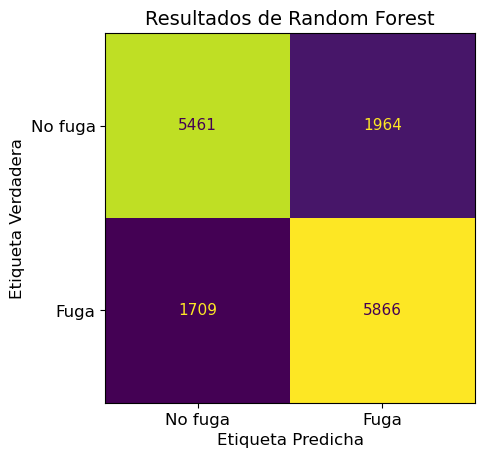

In [131]:
display_conf_matrix(rf_results[0]['confusion_matrix'], 'Random Forest')

#### _Gaussian NB Classifier_

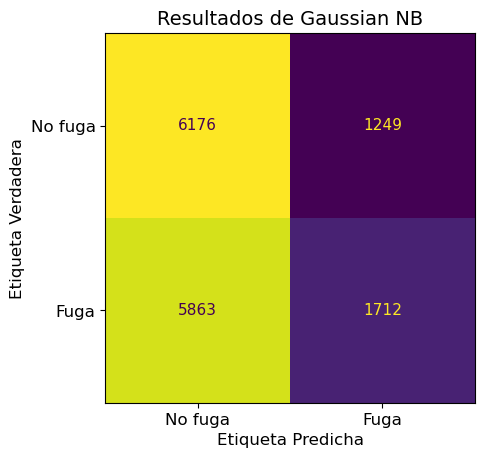

In [132]:
display_conf_matrix(gnb_results[0]['confusion_matrix'], 'Gaussian NB')

#### _KNN Classifier_

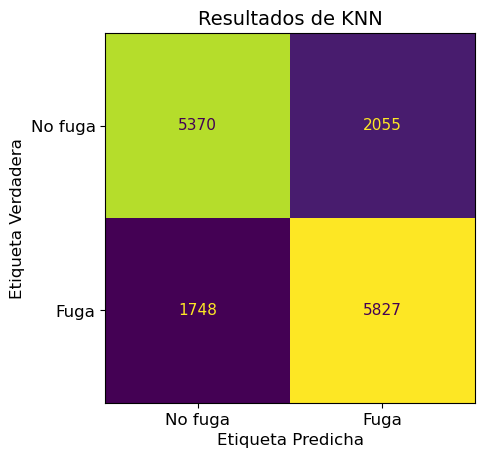

In [133]:
display_conf_matrix(knn_results[0]['confusion_matrix'], 'KNN')

#### _XGBoost Classifier_

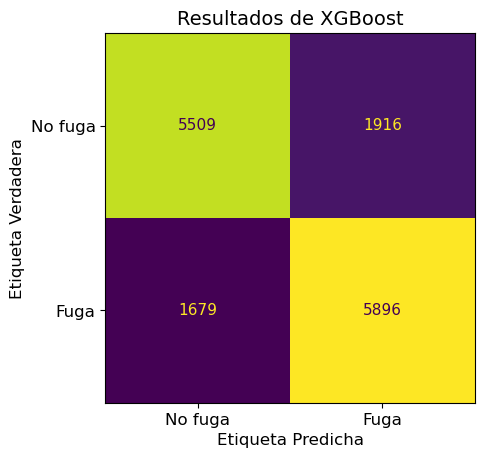

In [134]:
display_conf_matrix(xgb_results[0]['confusion_matrix'], 'XGBoost')

#### _Ensemble Classifier_

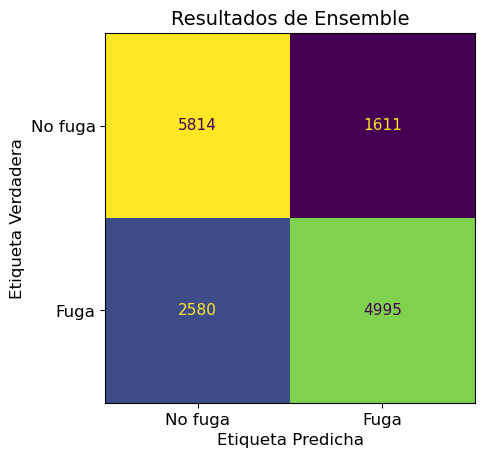

In [135]:
display_conf_matrix(vot_results[0]['confusion_matrix'], 'Ensemble')

#### Modelo DL unicapa

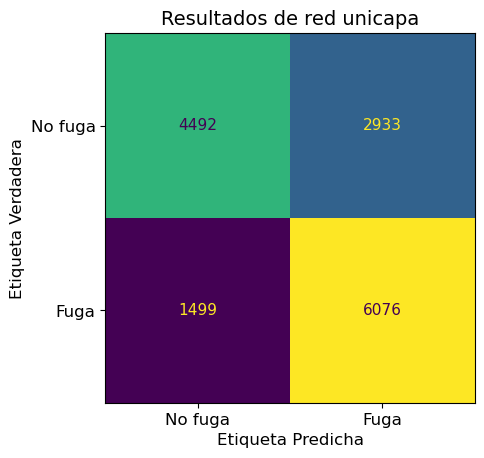

In [136]:
display_conf_matrix(dl_unil_results[0]['confusion_matrix'], 'red unicapa')

#### Modelo DL multicapa

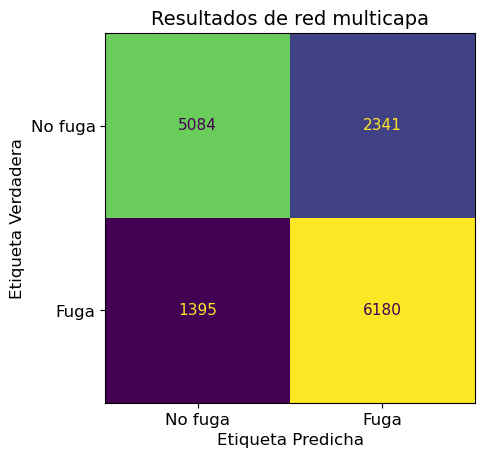

In [137]:
display_conf_matrix(dl_multil_results[0]['confusion_matrix'], 'red multicapa')

#### Modelo DL _ensemble_

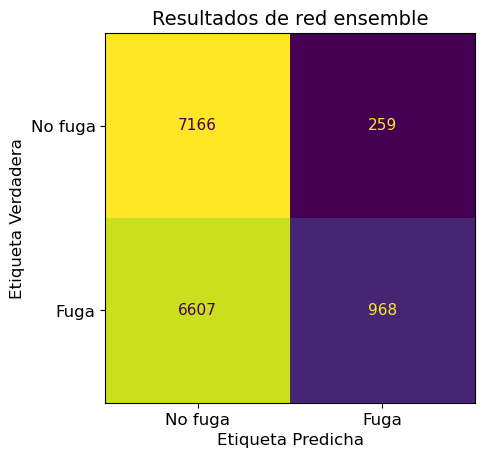

In [138]:
display_conf_matrix(dl_vot_results[0]['confusion_matrix'], 'red ensemble')

### Otros

In [139]:
display_seg_list = [
    ('Random Forest',   rf_seg_results),
    ('Gaussian NB',     gnb_seg_results),
    ('KNN',             knn_seg_results),
    ('XGBoost',         xgb_seg_results),
    ('Ensemble',        vot_seg_results),
    ('DL unilayer',     dl_unil_seg_results),
    ('DL multilayer',   dl_multil_seg_results),
    ('DL ensemble',     dl_vot_seg_results)
]

In [140]:
display_list = [
    ('Random Forest',   rf_results),
    ('Gaussian NB',     gnb_results),
    ('KNN',             knn_results),
    ('XGBoost',         xgb_results),
    ('Ensemble',        vot_results),
    ('DL unilayer',     dl_unil_results),
    ('DL multilayer',   dl_multil_results),
    ('DL ensemble',     dl_vot_results)
]

#### Comparativa de falsos positivos

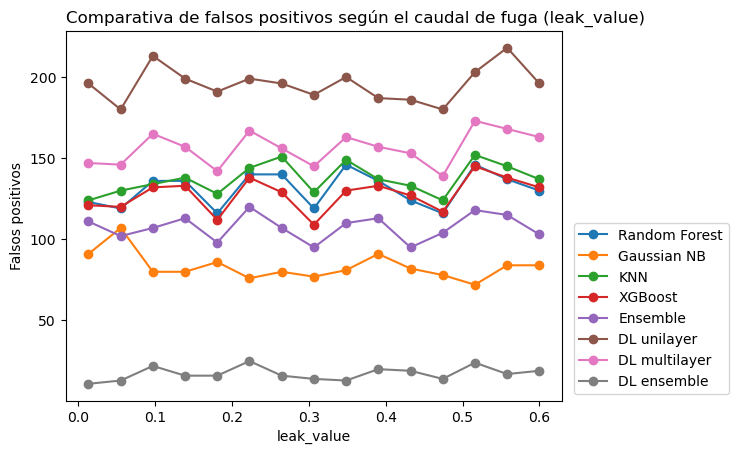

In [141]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_falsos_positivos.eps', format='eps')

plt.show()

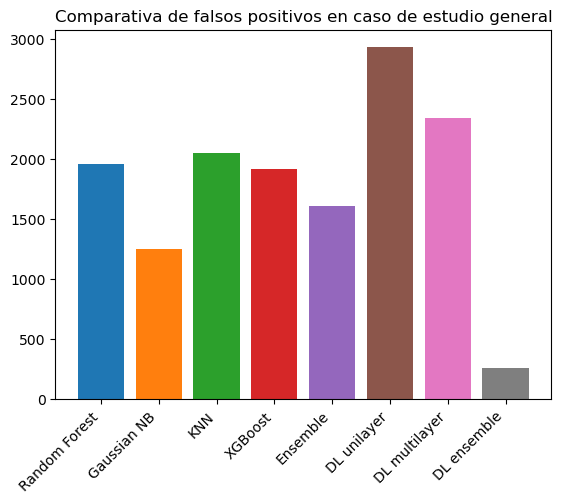

In [142]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_falsos_positivos_g.eps', format='eps')

plt.show()

#### Comparativa de sensibilidad (_recall_)

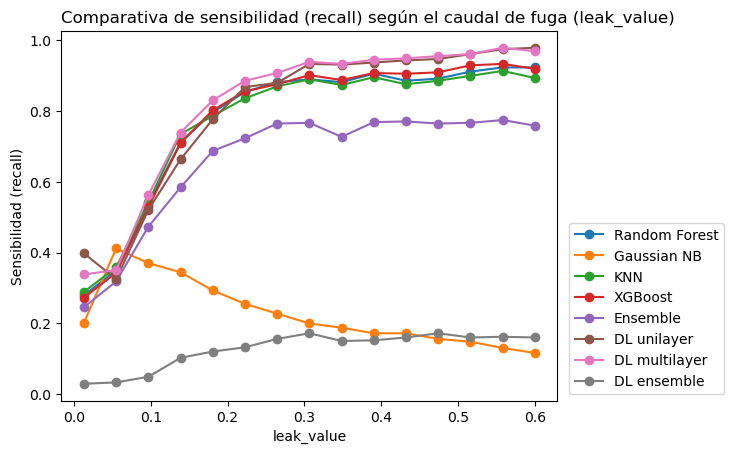

In [143]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_recall.eps', format='eps')

plt.show()

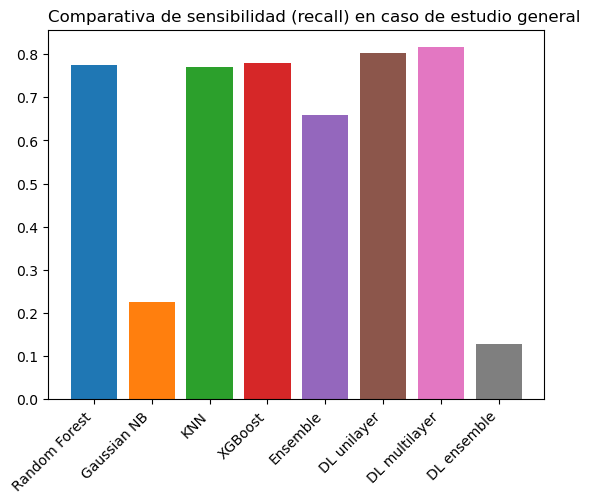

In [144]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_recall_g.eps', format='eps')

plt.show()

#### Comparativa de exactitud (_accuracy_)

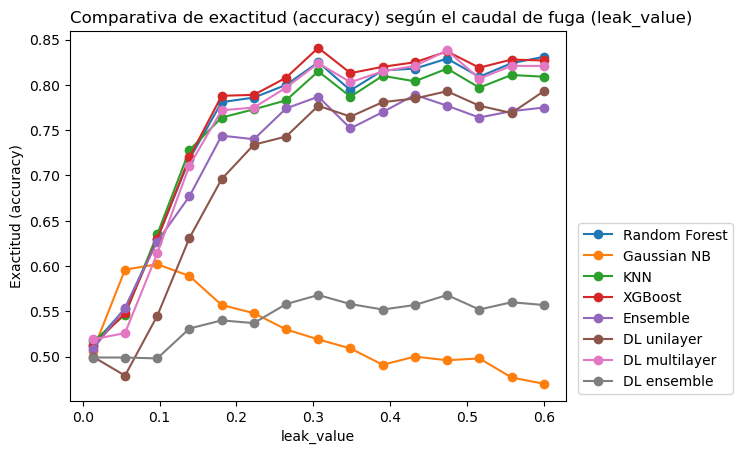

In [145]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_accuracy.eps', format='eps')

plt.show()

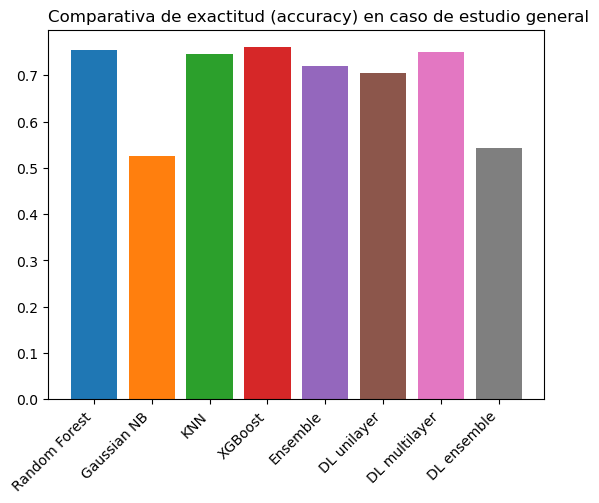

In [146]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_accuracy_g.eps', format='eps')

plt.show()

#### Comparativa de días hasta detección de fuga 

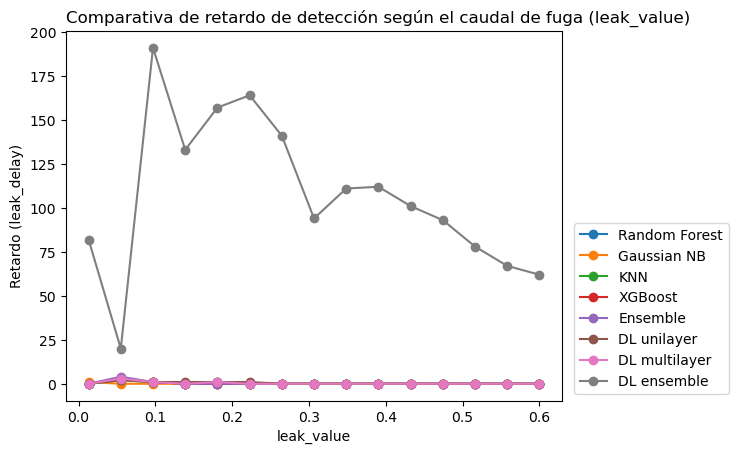

In [147]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_leak_delay.eps', format='eps')

plt.show()

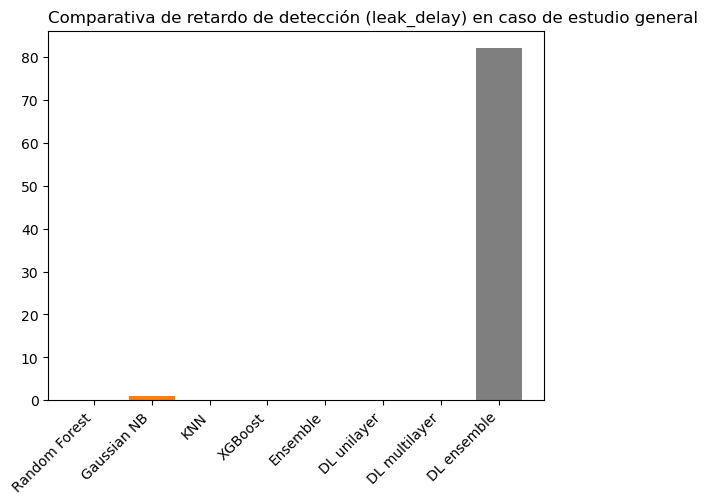

In [148]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_leak_delay_g.eps', format='eps')

plt.show()